In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [39]:
df=pd.read_csv('churn_prediction.csv')

In [62]:
networth='customer_nw_category'
dslt='days_since_last_transaction'
pmeb='previous_month_end_balance'
ambpq='average_monthly_balance_prevQ'
ambpq2='average_monthly_balance_prevQ2'
cmc='current_month_credit'
pmc='previous_month_credit'
cmd='current_month_debit'
pmd='previous_month_debit'
cmb='current_month_balance'
pmb='previous_month_balance'
cmg='current_month_gain'
pmg='previous_month_gain'
mc='monthly_comparison'
qc='quartile_comparison'
cb='current_balance'
etm='expenditure_this_month'

In [11]:
df.head()

customer_id    vintage  age gender  dependents     occupation    city  \
0            1  55.991071   66   Male         0.0  self_employed   187.0   
1            2  17.606817   35   Male         0.0  self_employed     NaN   
2            4  48.538644   31   Male         0.0       salaried   146.0   
3            5  21.863211   90    NaN         NaN  self_employed  1020.0   
4            6  50.309045   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  days_since_last_transaction  ...  \
0                     2          755                        224.0  ...   
1                     2         3214                         60.0  ...   
2                     2           41                          NaN  ...   
3                     2          582                        147.0  ...   
4                     3          388                         58.0  ...   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2                     5815.29                        4910.17   
3                     2291.91                        2084.54   
4                     1401.72                        1643.31   

   average_monthly_balance_prevQ2  current_month_credit  \
0                         1449.07                  0.20   
1                        12419.41                  0.56   
2                         2815.94                  0.61   
3                         1006.54                  0.47   
4                         1871.12                  0.33   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27                100.56   
2                   0.61              6046.73                259.23   
3                   0.47                 0.47               2143.33   
4                 714.61               588.62               1538.06   

   current_month_balance  previous_month_balance  churn  
0                1458.71                 1458.71      0  
1                6496.78                 8787.61      0  
2                5006.28                 5070.14      0  
3                2291.91                 1669.79      1  
4                1157.15                 1677.16      1  

[5 rows x 21 columns]

In [58]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'current_month_gain', 'previous_month_gain', 'monthly_comparison'],
      dtype='object')

In [40]:
#Imputing missing gender values
for i in range(len(df)):
    if df['gender'][i]!='Male' and df['gender'][i]!='Female':
        if df['occupation'][i]=='retired':
            df['gender'][i]='Male'
        elif df['occupation'][i]=='salaried':
            df['gender'][i]='Male'
        elif df['customer_nw_category'][i]==3:
            df['gender'][i]='Male'
        elif df['dependents'][i]>=2:
            df['gender'][i]='Male'
        else:
            df['gender'][i]='Female'

In [41]:
#Convert dependents into categorical
for i in range(len(df)):
    if df['dependents'][i]>2:
        df['dependents'][i]=3
df['dependents'].value_counts()

0.0    21435
2.0     2150
1.0     1395
3.0      939
Name: dependents, dtype: int64

In [42]:
df=df.astype({'dependents':'object','city':'object'})
df['dependents']=df['dependents'].fillna(0)
df['occupation']=df['occupation'].fillna('self_employed')

In [43]:
mean_days=np.mean(df['days_since_last_transaction'])
for i in range(len(df)):
    if pd.isnull(df['days_since_last_transaction'][i])==True:
        if df['dependents'][i]==0:
            df['days_since_last_transaction'][i]=74
        elif df['customer_nw_category'][i]==1:
            df['days_since_last_transaction'][i]=56
        elif df['occupation'][i]=='student':
            df['days_since_last_transaction'][i]=92
        else:
            df['days_since_last_transaction'][i]=mean_days

In [44]:
df.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
gender                              0
dependents                          0
occupation                          0
city                              803
customer_nw_category                0
branch_code                         0
days_since_last_transaction         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
dtype: int64

In [45]:
df.shape

(28382, 21)

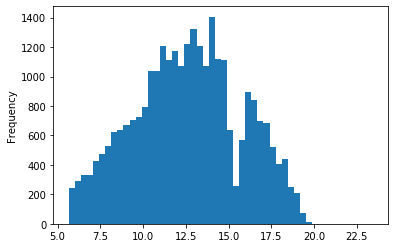

In [46]:
#Normalize the distribution of vintage variable
np.power(df['vintage'],1/3).plot.hist(bins=50)
df['vintage']=np.power(df['vintage'],1/3)

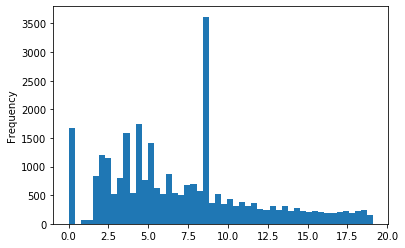

In [47]:
np.sqrt(df['days_since_last_transaction']).plot.hist(bins=50)
df['days_since_last_transaction']=np.sqrt(df['days_since_last_transaction'])

In [63]:
df['current_month_gain']=(df[cmc]+1)/(df[cmd]+1)
df['previous_month_gain']=(df[pmc]+1)/(df[pmd]+1)
df['monthly_comparison']=df[cmb]/df[pmb]
df['quartile_comparison']=df[ambpq]/df[ambpq2]
df['expenditure_this_month']=df[pmeb]-df[cb]
df[[cmg,pmg,mc,qc,etm]]

current_month_gain  previous_month_gain  monthly_comparison  \
0                1.000000             1.000000            1.000000   
1                0.000284             0.015360            0.739311   
2                0.000266             0.006187            0.987405   
3                1.000000             0.000686            1.372574   
4                0.002256             0.464966            0.689946   
...                   ...                  ...                 ...   
28377            1.000000             1.000000            1.000000   
28378            0.003004             0.003241            1.013067   
28379           27.582816            53.352473            1.061049   
28380            1.000000             1.000000            1.000000   
28381            0.001552             0.007707            0.736869   

       quartile_comparison  expenditure_this_month  
0                 1.006653                    0.00  
1                 0.627990                 3314.29  
2                 1.743705                 1902.13  
3                 2.070996                    0.00  
4                 0.878249                  474.00  
...                    ...                     ...  
28377             0.818664                    0.00  
28378             0.949109                  225.11  
28379             2.437530                -4494.42  
28380             0.906203                    0.00  
28381             0.722535                  714.29  

[28382 rows x 5 columns]

In [53]:
df.loc[df[cmg]<10][cmg].plot.box()
df.loc[df[cmg]<10].shape

(24829, 23)

In [54]:
df.loc[df[pmg]<10][pmg].plot.box()
df.loc[df[pmg]<10].shape

(24691, 23)

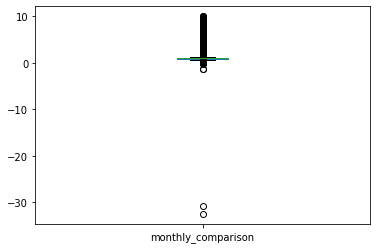

In [65]:
df.loc[df[mc]<10][mc].plot.box()